<a href="https://colab.research.google.com/github/Darius2527/SentimentAnalysis/blob/main/SentimentAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dataset
import pandas as pd
col_names=['sentiment','id','date','query','user','text']
df=pd.read_csv('SentimentAnalysisShortened.csv',
              encoding='ISO-8859-1',
               names=col_names)
df.head()

,sentiment,id,date,query,user,text
0,0,2047516617,Fri Jun 05 13:46:11 PDT 2009,NO_QUERY,KayKayNYC,"Not sure if should go to Zenkichi tonight, any..."
1,0,2047516652,Fri Jun 05 13:46:11 PDT 2009,NO_QUERY,ItGirlSerena,"@Izzy_Cullen Awww,Nate Does come on But Hes t..."
2,0,2047516893,Fri Jun 05 13:46:12 PDT 2009,NO_QUERY,green95j,Leaving DC. Really sick
3,0,2047516950,Fri Jun 05 13:46:13 PDT 2009,NO_QUERY,jennihassler,I'm jealous of @puggaloo and @legako's Ashevil...
4,0,2047516970,Fri Jun 05 13:46:13 PDT 2009,NO_QUERY,huey0929,@prettyodd89 i love you too baby. But im in tr...


In [2]:
df.shape

(19998, 6)

In [3]:
#removing irrelevant columns
df=df[['sentiment','text']]
df.head()

,sentiment,text
0,0,"Not sure if should go to Zenkichi tonight, any..."
1,0,"@Izzy_Cullen Awww,Nate Does come on But Hes t..."
2,0,Leaving DC. Really sick
3,0,I'm jealous of @puggaloo and @legako's Ashevil...
4,0,@prettyodd89 i love you too baby. But im in tr...


In [4]:
#checking the number of positive and negative data points
df['sentiment'].value_counts()
#it is a balanced dataset

sentiment
0    9999
4    9999
Name: count, dtype: int64

In [5]:
#since positive sentiment is depicted as 4, let us replace it with 1
df['sentiment'].replace(4,1,inplace=True)
df['sentiment'].value_counts()

sentiment
0    9999
1    9999
Name: count, dtype: int64

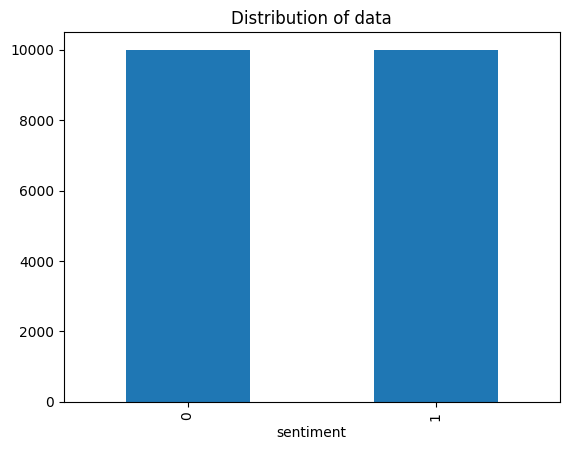

In [6]:
#plotting distribution of data
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)



In [7]:
#importing nltk to use for text preprocessing
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [8]:
#Lemmetizing all words in the text column for easier processing
from nltk.stem import WordNetLemmatizer
import re
corpus=[]
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]',' ',df['text'][i])
  review=review.lower()
  review=review.split()
  lemmatizer=WordNetLemmatizer()
  review=[lemmatizer.lemmatize(word) for word in review]
  review=' '.join(review)
  corpus.append(review)

In [9]:
corpus

['not sure if should go to zenkichi tonight anyone been review are ok kuma inn monasapple thanks for rec is booked until pm',
 'izzy cullen awww nate doe come on but he to busy to sstay and chat for an hour',
 'leaving dc really sick',
 'i m jealous of puggaloo and legako s asheville adventure',
 'prettyodd i love you too baby but im in traffic im scared it gonna die again',
 'it kinda hard for me to tweet whem my ipod is on it charger',
 'shawnking google map say mile from groton ma to lake george ny via i',
 'out of gin boooooo niclovesgin',
 'thisisbob poore brother need more exposure',
 'tire shop is taking forever funk sauce',
 'little puma awwz sorus but next year will suck',
 'evilmaharaja not in maine that s my home state i moved away wish i could go back',
 'rainy day maxin out and watching quot yes man quot',
 'sdrayray no the recording will not be available the public our offline gold mastermind member can only get access that sorry',
 'got up of my bed now i m not okay list

In [10]:
#performing integer encoding
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)

In [11]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'it': 5,
 'my': 6,
 'you': 7,
 'and': 8,
 'is': 9,
 'in': 10,
 'for': 11,
 's': 12,
 't': 13,
 'of': 14,
 'that': 15,
 'on': 16,
 'me': 17,
 'have': 18,
 'so': 19,
 'but': 20,
 'm': 21,
 'just': 22,
 'be': 23,
 'not': 24,
 'at': 25,
 'with': 26,
 'day': 27,
 'good': 28,
 'wa': 29,
 'can': 30,
 'now': 31,
 'this': 32,
 'out': 33,
 'up': 34,
 'like': 35,
 'no': 36,
 'get': 37,
 'all': 38,
 'are': 39,
 'go': 40,
 'quot': 41,
 'do': 42,
 'http': 43,
 'u': 44,
 'work': 45,
 'going': 46,
 'your': 47,
 'we': 48,
 'too': 49,
 'today': 50,
 'time': 51,
 'what': 52,
 'one': 53,
 'love': 54,
 'am': 55,
 'got': 56,
 'know': 57,
 'com': 58,
 'lol': 59,
 'will': 60,
 'from': 61,
 'don': 62,
 'im': 63,
 'about': 64,
 'want': 65,
 'really': 66,
 'there': 67,
 'if': 68,
 'back': 69,
 'some': 70,
 'think': 71,
 'night': 72,
 'amp': 73,
 'twitter': 74,
 'how': 75,
 'see': 76,
 'll': 77,
 'they': 78,
 'new': 79,
 'had': 80,
 'well': 81,
 'here': 82,
 'oh': 83,
 're'

In [12]:
voc_size=len(tokenizer.word_index)
voc_size

26833

In [13]:
tokenizer.document_count

19998

In [14]:
#converting sentences to vectors by replacing words with their integer encoded values
sequences=tokenizer.texts_to_sequences(corpus)
sequences

[[24,
  208,
  68,
  138,
  40,
  2,
  8765,
  108,
  315,
  103,
  1155,
  39,
  177,
  8766,
  5777,
  8767,
  91,
  11,
  8768,
  9,
  1560,
  262,
  470],
 [8769,
  3721,
  540,
  3223,
  268,
  112,
  16,
  20,
  87,
  2,
  497,
  2,
  8770,
  8,
  911,
  11,
  97,
  149],
 [498, 1156, 66, 213],
 [1, 21, 499, 14, 8771, 8, 8772, 12, 8773, 1736],
 [8774, 1, 54, 7, 49, 255, 20, 63, 10, 658, 63, 772, 5, 142, 858, 128],
 [5, 455, 319, 11, 17, 2, 157, 8775, 6, 706, 9, 16, 5, 2150],
 [8776, 939, 2561, 134, 1053, 61, 8777, 940, 2, 1991, 2151, 1320, 659, 1],
 [33, 14, 5778, 4464, 8778],
 [8779, 8780, 456, 89, 92, 5779],
 [3224, 790, 9, 439, 660, 3722, 1638],
 [189, 8781, 8782, 8783, 20, 159, 173, 60, 182],
 [8784, 24, 10, 2562, 15, 12, 6, 86, 884, 1, 1321, 227, 105, 1, 141, 40, 69],
 [773, 27, 8785, 33, 8, 170, 41, 144, 198, 41],
 [8786,
  36,
  3,
  1198,
  60,
  24,
  23,
  1383,
  3,
  1384,
  180,
  2563,
  1737,
  8787,
  1468,
  30,
  117,
  37,
  1561,
  15,
  113],
 [56, 34, 14, 6,

In [15]:
#finding max numb of words in a sentence in text column
max_len=max([len(x) for x in sequences])
max_len

34

In [16]:
#performing padding to make all vectors of the same length
from keras.utils import pad_sequences
X=pad_sequences(sequences,maxlen=max_len,padding='pre')
X

array([[    0,     0,     0, ...,  1560,   262,   470],
       [    0,     0,     0, ...,    11,    97,   149],
       [    0,     0,     0, ...,  1156,    66,   213],
       ...,
       [    0,     0,     0, ...,     5,    12, 26829],
       [    0,     0,     0, ...,   269,  1453,   429],
       [    0,     0,     0, ...,   294,   157, 26833]], dtype=int32)

In [17]:
len(X[0])

34

In [18]:
X.shape

(19998, 34)

In [19]:
#splitting dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,df['sentiment'],test_size=0.2,random_state=2)

In [20]:
#installing kerastuner to use to get model with best hyperparameters
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [21]:
#importing the required librariess to build our model
from keras import Sequential
from keras.layers import SimpleRNN,Embedding,LSTM,Dense
from keras import optimizers
from keras_tuner import RandomSearch



In [22]:
#let us build simple RNN model first
def build_model_RNN(hp):
  model=Sequential()
  model.add(Embedding(input_dim=voc_size+1,output_dim=100,input_length=max_len)) #total vocab count+1, ,no of words in sentences
  model.add(SimpleRNN(units=hp.Int('units_',min_value=128,max_value=512,step=32)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return model





In [23]:
#using RandomSearch for hyperparameter tuning
tuner=RandomSearch(build_model_RNN,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='SentimentAnalysis',project_name='SimpleRNN')

In [24]:
#searching for best hyperparameters for RNN model
tuner.search(X_train,y_train,epochs=5,batch_size=25,validation_split=0.2)

Trial 5 Complete [00h 13m 12s]
val_accuracy: 0.6417708198229471

Best val_accuracy So Far: 0.7610416611035665
Total elapsed time: 00h 53m 21s


In [25]:
tuner.results_summary()

Results summary
Results in SentimentAnalysis/SimpleRNN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units_: 160
learning_rate: 0.001
Score: 0.7610416611035665

Trial 0 summary
Hyperparameters:
units_: 288
learning_rate: 0.0001
Score: 0.7291666467984518

Trial 2 summary
Hyperparameters:
units_: 352
learning_rate: 0.001
Score: 0.7004166642824808

Trial 4 summary
Hyperparameters:
units_: 448
learning_rate: 0.01
Score: 0.6417708198229471

Trial 3 summary
Hyperparameters:
units_: 416
learning_rate: 0.01
Score: 0.6268750031789144


In [26]:
#creating model with best hyperparameters obtained by kerastuner
model_rnn=tuner.get_best_models(num_models=1)[0]

In [27]:

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           2683400   
                                                                 
 simple_rnn (SimpleRNN)      (None, 160)               41760     
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 2725321 (10.40 MB)
Trainable params: 2725321 (10.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#calculating model predictions for test data
y_pred_rnn=model_rnn.predict(X_test)
y_pred_rnn=(y_pred_rnn>0.5)

125/125 [==============================] - 2s 8ms/step


In [29]:
#checking accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
accuracy_rnn=accuracy_score(y_test,y_pred_rnn)
cm_rnn=confusion_matrix(y_test,y_pred_rnn)
ps_rnn=precision_score(y_test,y_pred_rnn)
print(accuracy_rnn)
print(cm_rnn)
print(ps_rnn)


0.7475
[[1436  541]
 [ 469 1554]]
0.7417661097852029


In [30]:
#now lets do the same using LSTM
def build_model_LSTM(hp):
  model=Sequential()
  model.add(Embedding(input_dim=voc_size+1,output_dim=100,input_length=max_len)) #total vocab count+1, ,no of words in sentences
  model.add(LSTM(units=hp.Int('units_',min_value=128,max_value=512,step=32)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return model





In [31]:
tuner_lstm=RandomSearch(build_model_LSTM,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='SentimentAnalysis',project_name='LSTM')

In [32]:
tuner_lstm.search(X_train,y_train,epochs=5,batch_size=25,validation_split=0.2)

Trial 5 Complete [00h 33m 22s]
val_accuracy: 0.7819791634877523

Best val_accuracy So Far: 0.7822916507720947
Total elapsed time: 02h 25m 42s


In [33]:
tuner_lstm.results_summary()

Results summary
Results in SentimentAnalysis/LSTM
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units_: 512
learning_rate: 0.001
Score: 0.7822916507720947

Trial 4 summary
Hyperparameters:
units_: 416
learning_rate: 0.001
Score: 0.7819791634877523

Trial 3 summary
Hyperparameters:
units_: 256
learning_rate: 0.001
Score: 0.7786458333333334

Trial 2 summary
Hyperparameters:
units_: 128
learning_rate: 0.0001
Score: 0.7753125031789144

Trial 0 summary
Hyperparameters:
units_: 384
learning_rate: 0.01
Score: 0.7348958452542623


In [34]:
model_lstm=tuner_lstm.get_best_models(num_models=1)[0]

In [35]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           2683400   
                                                                 
 lstm (LSTM)                 (None, 512)               1255424   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 3939337 (15.03 MB)
Trainable params: 3939337 (15.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
y_pred_lstm=model_lstm.predict(X_test)
y_pred_lstm=(y_pred_lstm>0.5)

125/125 [==============================] - 12s 95ms/step


In [37]:
accuracy_lstm=accuracy_score(y_test,y_pred_lstm)
cm_lstm=confusion_matrix(y_test,y_pred_lstm)
ps_lstm=precision_score(y_test,y_pred_lstm)
print(accuracy_lstm)
print(cm_lstm)
print(ps_lstm)

0.76675
[[1545  432]
 [ 501 1522]]
0.7789150460593655


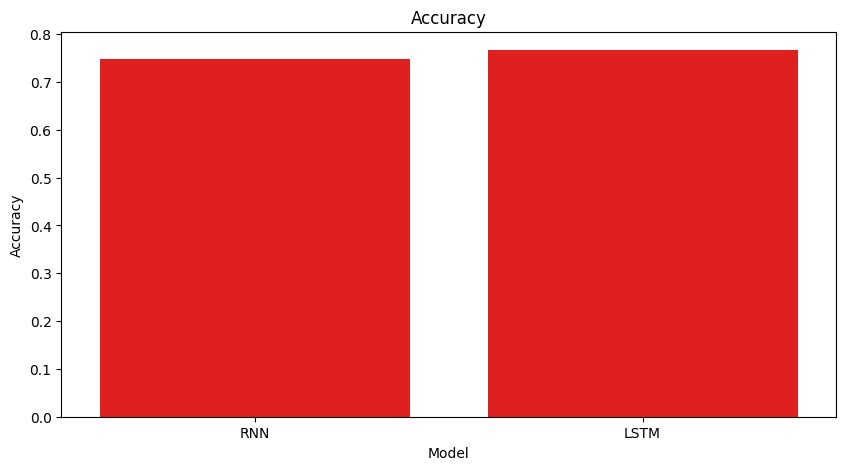

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x=['RNN','LSTM'],y=[accuracy_rnn,accuracy_lstm],color='red')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

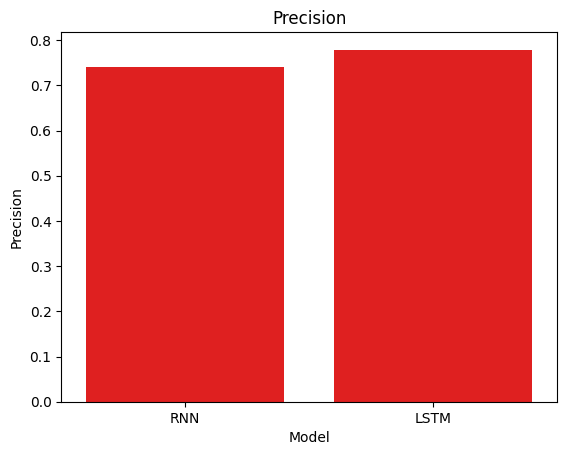

In [39]:
sns.barplot(x=['RNN','LSTM'],y=[ps_rnn,ps_lstm],color='red')
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

In [40]:
#as shown by the plots, both accuracy and precision are higher for LSTM model
#we can improve the model accuracy by using a bigger dataset (the dataset i have used initially consisted of 1600000 data points, but i used only 40000 to reduce computation time)


In [41]:
#now that we have found out that LSTM gives better accuracy, let us compare LSTM and stacked LSTM
#lets create stacked LSTM model first

In [42]:
#now lets do the same using LSTM
def build_model_stacked_LSTM(hp):
  model=Sequential()
  model.add(Embedding(input_dim=voc_size+1,output_dim=100,input_length=max_len)) #total vocab count+1, ,no of words in sentences
  for i in range(hp.Int('num_layers',min_value=1,max_value=4)):
    model.add(LSTM(units=hp.Int('units_'+str(i),min_value=128,max_value=512,step=32),return_sequences=True))
  model.add(LSTM(units=hp.Int('units_final',min_value=128,max_value=512,step=32)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='binary_crossentropy',metrics=['accuracy'])
  return model





In [43]:
tuner_stacked_lstm=RandomSearch(build_model_stacked_LSTM,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='SentimentAnalysis',project_name='stacked_lstm')

In [44]:
tuner_stacked_lstm.search(X_train,y_train,epochs=5,batch_size=25,validation_split=0.2)

Trial 5 Complete [00h 58m 11s]
val_accuracy: 0.7655208309491476

Best val_accuracy So Far: 0.7773958444595337
Total elapsed time: 06h 31m 25s


In [45]:
tuner_stacked_lstm.results_summary()

Results summary
Results in SentimentAnalysis/stacked_lstm
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 4
units_0: 352
units_final: 384
learning_rate: 0.001
units_1: 128
units_2: 128
units_3: 128
Score: 0.7773958444595337

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 128
units_final: 160
learning_rate: 0.0001
units_1: 480
units_2: 160
units_3: 480
Score: 0.7655208309491476

Trial 0 summary
Hyperparameters:
num_layers: 1
units_0: 512
units_final: 352
learning_rate: 0.01
Score: 0.659583310286204

Trial 3 summary
Hyperparameters:
num_layers: 2
units_0: 416
units_final: 192
learning_rate: 0.01
units_1: 480
units_2: 480
units_3: 416
Score: 0.5041666428248087

Trial 2 summary
Hyperparameters:
num_layers: 3
units_0: 416
units_final: 128
learning_rate: 0.01
units_1: 128
units_2: 384
units_3: 224
Score: 0.5040624737739563


In [46]:
model_stacked_lstm=tuner_stacked_lstm.get_best_models(num_models=1)[0]

In [47]:
model_stacked_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 100)           2683400   
                                                                 
 lstm (LSTM)                 (None, 34, 352)           637824    
                                                                 
 lstm_1 (LSTM)               (None, 34, 128)           246272    
                                                                 
 lstm_2 (LSTM)               (None, 34, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 34, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 384)               787968    
                                                                 
 dense (Dense)               (None, 1)                 3

In [48]:
y_pred_stacked_lstm=model_stacked_lstm.predict(X_test)
y_pred_stacked_lstm=(y_pred_stacked_lstm>0.5)

125/125 [==============================] - 22s 159ms/step


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
accuracy_stacked_lstm=accuracy_score(y_test,y_pred_stacked_lstm)
cm_stacked_lstm=confusion_matrix(y_test,y_pred_stacked_lstm)
ps_stacked_lstm=precision_score(y_test,y_pred_stacked_lstm)
print(accuracy_stacked_lstm)
print(cm_stacked_lstm)
print(ps_stacked_lstm)

0.769
[[1458  519]
 [ 405 1618]]
0.7571361722040243


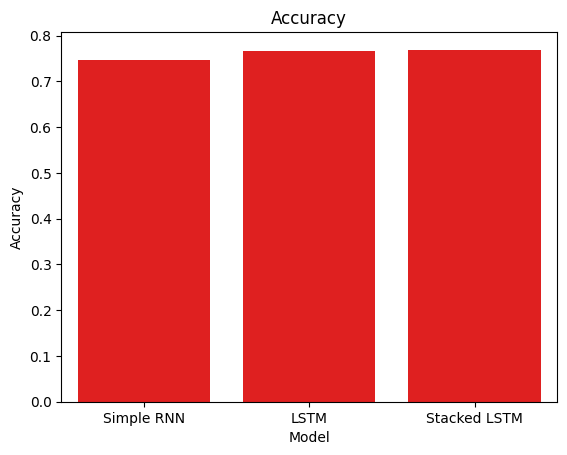

In [50]:
#comparing accuracy of lstm and stacked lstm
sns.barplot(x=['Simple RNN','LSTM','Stacked LSTM'],y=[accuracy_rnn,accuracy_lstm,accuracy_stacked_lstm],color='red')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

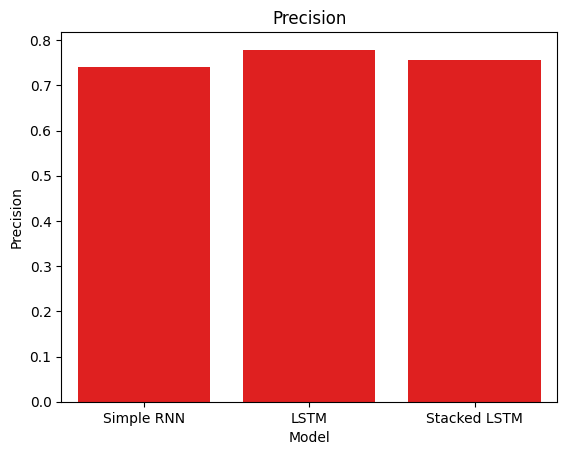

In [51]:
#comparing precision of lstm and stacked lstm
sns.barplot(x=['Simple RNN','LSTM','Stacked LSTM'],y=[ps_rnn,ps_lstm,ps_stacked_lstm],color='red')
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

In [ ]:
#we can improve the model accuracy by using a bigger dataset (the dataset i have used initially consisted of 1600000 data points, but i used only 40000 to reduce computation time)
#we can also improve accuracy by running RandomSearch for a higher number of trials and higher number of epochs
#generally, accuracy and precision of stacked LSTM must be the greatest, but it may be falling short due to overfitting, no regularization, and hyperparameter tuning only testing a few hyperparameter combinations (trial and epochs are less in this project due to computation time taken)